In [46]:
!pip install fredapi

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option("display.max_columns", 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

#Get your key from here: https://fred.stlouisfed.org/docs/api/api_key.html
fred_key = 'Put your key here'


##1. Create Fred object

In [48]:
fred = Fred(api_key = fred_key)
fred

##2. Search for economic data

In [49]:
sp_search = fred.search('S&P', order_by = 'popularity')
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-11-15,2023-11-15,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-11-14,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-15 09:40:06-06:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-11-15,2023-11-15,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-10-31 08:12:01-05:00,88,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-11-15,2023-11-15,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-11-14,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-15 09:40:10-06:00,83,This data represents the effective yield of th...
SP500,SP500,2023-11-15,2023-11-15,S&P 500,2013-11-15,2023-11-14,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-14 19:10:59-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-11-15,2023-11-15,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...


In [50]:
sp_search.shape

(1000, 15)

##3. Pull raw data & Plot

In [51]:
sp500 = fred.get_series(series_id = 'SP500')
sp500

2013-11-15    1798.18
2013-11-18    1791.53
2013-11-19    1787.87
2013-11-20    1781.37
2013-11-21    1795.85
               ...   
2023-11-08    4382.78
2023-11-09    4347.35
2023-11-10    4415.24
2023-11-13    4411.55
2023-11-14    4495.70
Length: 2608, dtype: float64

<Axes: title={'center': 'S&P 500'}>

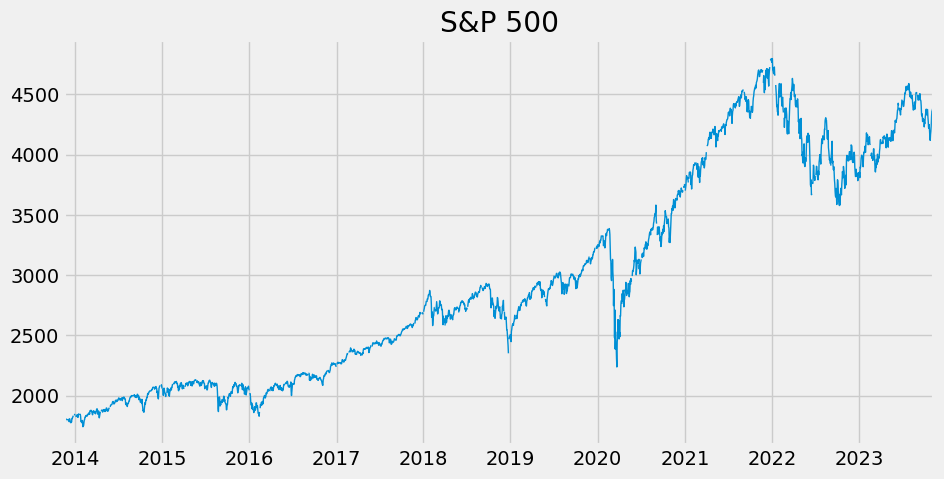

In [52]:
sp500.plot(figsize = (10,5), title = 'S&P 500', lw = 1)

##4. Pull & Join multiple data series

In [53]:
unemp_reults = fred.search('unemployment')
unemp_reults.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-11-15,2023-11-15,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-11-15,2023-11-15,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-03 07:50:14-05:00,57,The unemployment rate represents the number of...
NROU,NROU,2023-11-15,2023-11-15,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,68,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2023-11-15,2023-11-15,Continued Claims (Insured Unemployment),1967-01-07,2023-10-28,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-11-09 07:33:05-06:00,74,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2023-11-15,2023-11-15,Unemployment Level,1948-01-01,2023-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-11-03 07:50:05-05:00,69,The series comes from the 'Current Population ...


In [54]:
unrate = fred.get_series('UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
2023-09-01    3.8
2023-10-01    3.9
Length: 910, dtype: float64

<Axes: title={'center': 'Unemployment Rate'}>

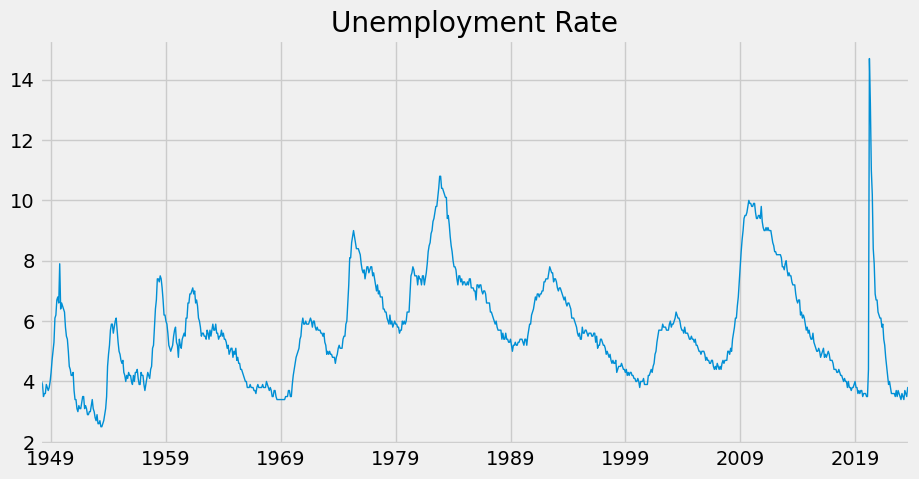

In [55]:
unrate.plot(figsize = (10,5), lw=1, title = "Unemployment Rate")

In [56]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')


In [57]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains("Unemployment Rate")]

In [58]:
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-11-15,2023-11-15,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-11-15,2023-11-15,Unemployment Rate - Black or African American,1972-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:06-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2023-11-15,2023-11-15,Unemployment Rate in California,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:02-05:00,60,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-11-15,2023-11-15,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-11-15,2023-11-15,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,11,Series Is Presented Here As Three Variables--(...


##Keeps States only

In [59]:
for index, row in unemp_df.iterrows():
  if (("LNS14" in row['id']) or ("M089" in row['id']) or ("LRUN" in row['id']) or
   ("LASMT" in row['id']) or ("UNRATE" in row['id']) or ("USAURAMS" in row['id']) or ("U2RATE" in row['id'])or
   ("CMWRUR" in row['id']) or ("CSOUUR" in row['id'])or ("CNERUR" in row['id']) or ("CWSTUR" in row['id'])):
   unemp_df.drop(index, axis=0, inplace=True)
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-11-15,2023-11-15,Unemployment Rate in California,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:02-05:00,60,None
TXUR,TXUR,2023-11-15,2023-11-15,Unemployment Rate in Texas,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:02-05:00,53,None
NYUR,NYUR,2023-11-15,2023-11-15,Unemployment Rate in New York,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:03-05:00,52,None
FLUR,FLUR,2023-11-15,2023-11-15,Unemployment Rate in Florida,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:04-05:00,48,None
OHUR,OHUR,2023-11-15,2023-11-15,Unemployment Rate in Ohio,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:03-05:00,39,None


###Go through each id and pull the series data

In [60]:
all_results = []
for myid in unemp_df.index:

    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)

unemp_states = pd.concat(all_results, axis = 1)


In [61]:
unemp_states

,CAUR,TXUR,NYUR,FLUR,OHUR,MIUR,ALUR,MNUR,ILUR,COUR,MAUR,PAUR,NCUR,KYUR,WIUR,GAUR,WAUR,VAUR,ORUR,AZUR,IAUR,AKUR,TNUR,NDUR,WVUR,MDUR,NMUR,ARUR,INUR,HIUR,NJUR,LAUR,SCUR,NVUR,MOUR,MSUR,MTUR,OKUR,NEUR,UTUR,DEUR,IDUR,SDUR,CTUR,WYUR,MEUR,KSUR,DCUR,RIUR,NHUR,PRUR,VTUR
1976-01-01,9.2,5.8,10.3,9.7,8.1,9.9,6.6,6.0,6.6,5.8,10.5,8.0,6.4,5.6,5.8,8.4,8.5,6.1,9.5,10.2,4.3,7.1,6.0,3.4,7.5,6.4,8.6,7.3,6.6,9.8,10.3,6.3,7.4,9.2,5.9,6.7,5.8,5.8,3.3,5.8,8.0,5.6,3.3,9.8,4.1,8.7,4.2,8.7,7.8,6.5,19.6,8.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,9.9,6.6,6.0,6.6,5.7,10.5,8.1,6.4,5.6,5.8,8.4,8.5,6.1,9.5,10.2,4.3,7.1,6.0,3.4,7.5,6.4,8.7,7.3,6.6,9.8,10.3,6.3,7.4,9.2,5.9,6.7,5.8,5.8,3.3,5.9,8.0,5.6,3.3,9.8,4.1,8.7,4.2,8.7,7.8,6.5,19.5,8.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,9.9,6.6,5.9,6.6,5.7,10.5,8.1,6.4,5.6,5.7,8.4,8.4,6.1,9.4,10.1,4.3,7.0,6.0,3.4,7.5,6.4,8.7,7.3,6.5,9.8,10.3,6.3,7.3,9.2,5.9,6.6,5.8,5.8,3.3,5.8,8.0,5.6,3.2,9.8,4.1,8.6,4.2,8.6,7.7,6.5,19.3,8.6
1976-04-01,9.1,5.9,10.2,9.5,8.0,9.8,6.5,5.8,6.6,5.6,10.3,8.1,6.3,5.6,5.6,8.3,8.5,6.0,9.2,10.0,4.2,6.9,6.0,3.5,7.5,6.4,8.6,7.2,6.3,9.7,10.3,6.4,7.2,9.0,6.0,6.4,5.8,5.8,3.2,5.8,8.1,5.6,3.1,9.6,4.0,8.6,4.2,8.5,7.7,6.5,19.0,8.6
1976-05-01,9.0,5.9,10.1,9.3,7.8,9.6,6.4,5.7,6.6,5.6,10.1,8.1,6.1,5.5,5.5,8.1,8.5,5.9,9.1,9.8,4.1,6.9,5.9,3.6,7.4,6.5,8.6,7.1,6.0,9.4,10.3,6.5,7.0,8.9,6.0,6.3,5.8,5.7,3.1,5.7,8.3,5.6,3.1,9.4,3.9,8.5,4.2,8.4,7.7,6.5,18.9,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,4.5,4.1,3.9,2.6,3.6,3.7,2.2,2.9,4.1,2.8,2.8,4.0,3.4,3.8,2.4,3.2,4.1,2.9,3.7,3.4,2.7,3.6,3.3,2.1,3.3,2.4,3.5,2.7,3.1,3.1,3.6,3.6,3.1,5.4,2.5,3.2,2.3,2.8,1.9,2.3,4.2,2.6,1.9,3.7,3.3,2.4,2.9,5.1,3.0,1.9,6.1,2.1
2023-06-01,4.6,4.1,3.9,2.6,3.4,3.6,2.2,2.9,4.0,2.8,2.6,3.8,3.3,3.8,2.5,3.2,3.8,2.7,3.5,3.5,2.7,3.7,3.2,2.0,3.3,2.0,3.5,2.6,3.2,3.0,3.7,3.6,3.1,5.4,2.6,3.1,2.4,2.7,1.9,2.4,4.2,2.7,1.8,3.7,3.1,2.4,2.8,5.1,2.9,1.8,6.1,1.9
2023-07-01,4.6,4.1,3.9,2.7,3.3,3.6,2.1,3.0,4.0,2.9,2.5,3.5,3.3,3.9,2.6,3.2,3.6,2.5,3.4,3.6,2.7,3.8,3.1,2.0,3.4,1.8,3.6,2.6,3.3,2.8,3.9,3.4,3.1,5.3,2.7,3.0,2.5,2.7,2.0,2.4,4.1,2.8,1.9,3.6,3.0,2.4,2.7,5.0,2.8,1.7,6.2,1.8
2023-08-01,4.6,4.1,3.9,2.7,3.4,3.7,2.1,3.1,4.1,3.1,2.6,3.5,3.3,4.0,2.9,3.3,3.6,2.5,3.4,3.8,2.9,3.9,3.1,1.9,3.6,1.7,3.7,2.7,3.4,2.8,4.2,3.3,3.0,5.4,2.8,3.2,2.5,2.8,2.0,2.5,4.1,3.0,1.9,3.5,2.9,2.5,2.7,5.0,2.7,1.8,6.2,1.8


##Handling NaN values

<Axes: >

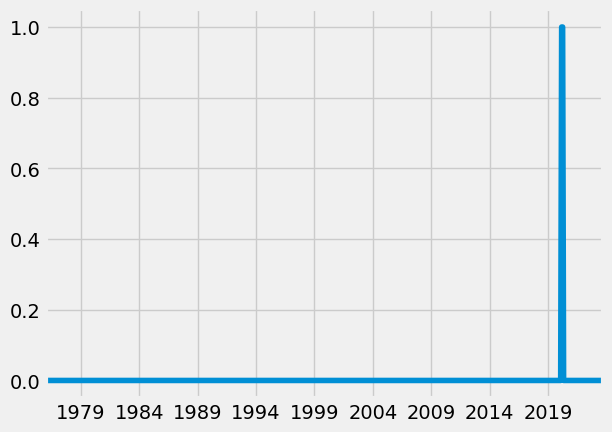

In [62]:
unemp_states.isna().sum(axis = 1).plot()

In [63]:
# Fill the NaN values with the last observed value for each state
df_filled = unemp_states.fillna(method='ffill', axis=0)

<Axes: >

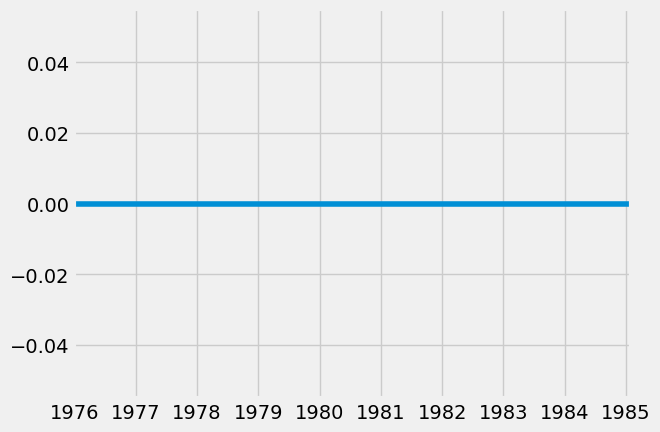

In [64]:
df_filled.head(110).isna().sum(axis = 1).plot()

In [65]:
df_filled

,CAUR,TXUR,NYUR,FLUR,OHUR,MIUR,ALUR,MNUR,ILUR,COUR,MAUR,PAUR,NCUR,KYUR,WIUR,GAUR,WAUR,VAUR,ORUR,AZUR,IAUR,AKUR,TNUR,NDUR,WVUR,MDUR,NMUR,ARUR,INUR,HIUR,NJUR,LAUR,SCUR,NVUR,MOUR,MSUR,MTUR,OKUR,NEUR,UTUR,DEUR,IDUR,SDUR,CTUR,WYUR,MEUR,KSUR,DCUR,RIUR,NHUR,PRUR,VTUR
1976-01-01,9.2,5.8,10.3,9.7,8.1,9.9,6.6,6.0,6.6,5.8,10.5,8.0,6.4,5.6,5.8,8.4,8.5,6.1,9.5,10.2,4.3,7.1,6.0,3.4,7.5,6.4,8.6,7.3,6.6,9.8,10.3,6.3,7.4,9.2,5.9,6.7,5.8,5.8,3.3,5.8,8.0,5.6,3.3,9.8,4.1,8.7,4.2,8.7,7.8,6.5,19.6,8.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,9.9,6.6,6.0,6.6,5.7,10.5,8.1,6.4,5.6,5.8,8.4,8.5,6.1,9.5,10.2,4.3,7.1,6.0,3.4,7.5,6.4,8.7,7.3,6.6,9.8,10.3,6.3,7.4,9.2,5.9,6.7,5.8,5.8,3.3,5.9,8.0,5.6,3.3,9.8,4.1,8.7,4.2,8.7,7.8,6.5,19.5,8.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,9.9,6.6,5.9,6.6,5.7,10.5,8.1,6.4,5.6,5.7,8.4,8.4,6.1,9.4,10.1,4.3,7.0,6.0,3.4,7.5,6.4,8.7,7.3,6.5,9.8,10.3,6.3,7.3,9.2,5.9,6.6,5.8,5.8,3.3,5.8,8.0,5.6,3.2,9.8,4.1,8.6,4.2,8.6,7.7,6.5,19.3,8.6
1976-04-01,9.1,5.9,10.2,9.5,8.0,9.8,6.5,5.8,6.6,5.6,10.3,8.1,6.3,5.6,5.6,8.3,8.5,6.0,9.2,10.0,4.2,6.9,6.0,3.5,7.5,6.4,8.6,7.2,6.3,9.7,10.3,6.4,7.2,9.0,6.0,6.4,5.8,5.8,3.2,5.8,8.1,5.6,3.1,9.6,4.0,8.6,4.2,8.5,7.7,6.5,19.0,8.6
1976-05-01,9.0,5.9,10.1,9.3,7.8,9.6,6.4,5.7,6.6,5.6,10.1,8.1,6.1,5.5,5.5,8.1,8.5,5.9,9.1,9.8,4.1,6.9,5.9,3.6,7.4,6.5,8.6,7.1,6.0,9.4,10.3,6.5,7.0,8.9,6.0,6.3,5.8,5.7,3.1,5.7,8.3,5.6,3.1,9.4,3.9,8.5,4.2,8.4,7.7,6.5,18.9,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,4.5,4.1,3.9,2.6,3.6,3.7,2.2,2.9,4.1,2.8,2.8,4.0,3.4,3.8,2.4,3.2,4.1,2.9,3.7,3.4,2.7,3.6,3.3,2.1,3.3,2.4,3.5,2.7,3.1,3.1,3.6,3.6,3.1,5.4,2.5,3.2,2.3,2.8,1.9,2.3,4.2,2.6,1.9,3.7,3.3,2.4,2.9,5.1,3.0,1.9,6.1,2.1
2023-06-01,4.6,4.1,3.9,2.6,3.4,3.6,2.2,2.9,4.0,2.8,2.6,3.8,3.3,3.8,2.5,3.2,3.8,2.7,3.5,3.5,2.7,3.7,3.2,2.0,3.3,2.0,3.5,2.6,3.2,3.0,3.7,3.6,3.1,5.4,2.6,3.1,2.4,2.7,1.9,2.4,4.2,2.7,1.8,3.7,3.1,2.4,2.8,5.1,2.9,1.8,6.1,1.9
2023-07-01,4.6,4.1,3.9,2.7,3.3,3.6,2.1,3.0,4.0,2.9,2.5,3.5,3.3,3.9,2.6,3.2,3.6,2.5,3.4,3.6,2.7,3.8,3.1,2.0,3.4,1.8,3.6,2.6,3.3,2.8,3.9,3.4,3.1,5.3,2.7,3.0,2.5,2.7,2.0,2.4,4.1,2.8,1.9,3.6,3.0,2.4,2.7,5.0,2.8,1.7,6.2,1.8
2023-08-01,4.6,4.1,3.9,2.7,3.4,3.7,2.1,3.1,4.1,3.1,2.6,3.5,3.3,4.0,2.9,3.3,3.6,2.5,3.4,3.8,2.9,3.9,3.1,1.9,3.6,1.7,3.7,2.7,3.4,2.8,4.2,3.3,3.0,5.4,2.8,3.2,2.5,2.8,2.0,2.5,4.1,3.0,1.9,3.5,2.9,2.5,2.7,5.0,2.7,1.8,6.2,1.8


##Replace States id with names

In [66]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
id_to_state

{'CAUR': 'California',
 'TXUR': 'Texas',
 'NYUR': 'New York',
 'FLUR': 'Florida',
 'OHUR': 'Ohio',
 'MIUR': 'Michigan',
 'ALUR': 'Alabama',
 'MNUR': 'Minnesota',
 'ILUR': 'Illinois',
 'COUR': 'Colorado',
 'MAUR': 'Massachusetts',
 'PAUR': 'Pennsylvania',
 'NCUR': 'North Carolina',
 'KYUR': 'Kentucky',
 'WIUR': 'Wisconsin',
 'GAUR': 'Georgia',
 'WAUR': 'Washington',
 'VAUR': 'Virginia',
 'ORUR': 'Oregon',
 'AZUR': 'Arizona',
 'IAUR': 'Iowa',
 'AKUR': 'Alaska',
 'TNUR': 'Tennessee',
 'NDUR': 'North Dakota',
 'WVUR': 'West Virginia',
 'MDUR': 'Maryland',
 'NMUR': 'New Mexico',
 'ARUR': 'Arkansas',
 'INUR': 'Indiana',
 'HIUR': 'Hawaii',
 'NJUR': 'New Jersey',
 'LAUR': 'Louisiana',
 'SCUR': 'South Carolina',
 'NVUR': 'Nevada',
 'MOUR': 'Missouri',
 'MSUR': 'Mississippi',
 'MTUR': 'Montana',
 'OKUR': 'Oklahoma',
 'NEUR': 'Nebraska',
 'UTUR': 'Utah',
 'DEUR': 'Delaware',
 'IDUR': 'Idaho',
 'SDUR': 'South Dakota',
 'CTUR': 'Connecticut',
 'WYUR': 'Wyoming',
 'MEUR': 'Maine',
 'KSUR': 'Kansas',

In [67]:
# Fix DC
id_to_state['DCUR'] = 'District Of Columbia'
id_to_state

{'CAUR': 'California',
 'TXUR': 'Texas',
 'NYUR': 'New York',
 'FLUR': 'Florida',
 'OHUR': 'Ohio',
 'MIUR': 'Michigan',
 'ALUR': 'Alabama',
 'MNUR': 'Minnesota',
 'ILUR': 'Illinois',
 'COUR': 'Colorado',
 'MAUR': 'Massachusetts',
 'PAUR': 'Pennsylvania',
 'NCUR': 'North Carolina',
 'KYUR': 'Kentucky',
 'WIUR': 'Wisconsin',
 'GAUR': 'Georgia',
 'WAUR': 'Washington',
 'VAUR': 'Virginia',
 'ORUR': 'Oregon',
 'AZUR': 'Arizona',
 'IAUR': 'Iowa',
 'AKUR': 'Alaska',
 'TNUR': 'Tennessee',
 'NDUR': 'North Dakota',
 'WVUR': 'West Virginia',
 'MDUR': 'Maryland',
 'NMUR': 'New Mexico',
 'ARUR': 'Arkansas',
 'INUR': 'Indiana',
 'HIUR': 'Hawaii',
 'NJUR': 'New Jersey',
 'LAUR': 'Louisiana',
 'SCUR': 'South Carolina',
 'NVUR': 'Nevada',
 'MOUR': 'Missouri',
 'MSUR': 'Mississippi',
 'MTUR': 'Montana',
 'OKUR': 'Oklahoma',
 'NEUR': 'Nebraska',
 'UTUR': 'Utah',
 'DEUR': 'Delaware',
 'IDUR': 'Idaho',
 'SDUR': 'South Dakota',
 'CTUR': 'Connecticut',
 'WYUR': 'Wyoming',
 'MEUR': 'Maine',
 'KSUR': 'Kansas',

In [68]:
df_filled.columns = [id_to_state[c] for c in df_filled.columns]


In [69]:
df_filled.head()

,California,Texas,New York,Florida,Ohio,Michigan,Alabama,Minnesota,Illinois,Colorado,Massachusetts,Pennsylvania,North Carolina,Kentucky,Wisconsin,Georgia,Washington,Virginia,Oregon,Arizona,Iowa,Alaska,Tennessee,North Dakota,West Virginia,Maryland,New Mexico,Arkansas,Indiana,Hawaii,New Jersey,Louisiana,South Carolina,Nevada,Missouri,Mississippi,Montana,Oklahoma,Nebraska,Utah,Delaware,Idaho,South Dakota,Connecticut,Wyoming,Maine,Kansas,District Of Columbia,Rhode Island,New Hampshire,Puerto Rico,Vermont
1976-01-01,9.2,5.8,10.3,9.7,8.1,9.9,6.6,6.0,6.6,5.8,10.5,8.0,6.4,5.6,5.8,8.4,8.5,6.1,9.5,10.2,4.3,7.1,6.0,3.4,7.5,6.4,8.6,7.3,6.6,9.8,10.3,6.3,7.4,9.2,5.9,6.7,5.8,5.8,3.3,5.8,8.0,5.6,3.3,9.8,4.1,8.7,4.2,8.7,7.8,6.5,19.6,8.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,9.9,6.6,6.0,6.6,5.7,10.5,8.1,6.4,5.6,5.8,8.4,8.5,6.1,9.5,10.2,4.3,7.1,6.0,3.4,7.5,6.4,8.7,7.3,6.6,9.8,10.3,6.3,7.4,9.2,5.9,6.7,5.8,5.8,3.3,5.9,8.0,5.6,3.3,9.8,4.1,8.7,4.2,8.7,7.8,6.5,19.5,8.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,9.9,6.6,5.9,6.6,5.7,10.5,8.1,6.4,5.6,5.7,8.4,8.4,6.1,9.4,10.1,4.3,7.0,6.0,3.4,7.5,6.4,8.7,7.3,6.5,9.8,10.3,6.3,7.3,9.2,5.9,6.6,5.8,5.8,3.3,5.8,8.0,5.6,3.2,9.8,4.1,8.6,4.2,8.6,7.7,6.5,19.3,8.6
1976-04-01,9.1,5.9,10.2,9.5,8.0,9.8,6.5,5.8,6.6,5.6,10.3,8.1,6.3,5.6,5.6,8.3,8.5,6.0,9.2,10.0,4.2,6.9,6.0,3.5,7.5,6.4,8.6,7.2,6.3,9.7,10.3,6.4,7.2,9.0,6.0,6.4,5.8,5.8,3.2,5.8,8.1,5.6,3.1,9.6,4.0,8.6,4.2,8.5,7.7,6.5,19.0,8.6
1976-05-01,9.0,5.9,10.1,9.3,7.8,9.6,6.4,5.7,6.6,5.6,10.1,8.1,6.1,5.5,5.5,8.1,8.5,5.9,9.1,9.8,4.1,6.9,5.9,3.6,7.4,6.5,8.6,7.1,6.0,9.4,10.3,6.5,7.0,8.9,6.0,6.3,5.8,5.7,3.1,5.7,8.3,5.6,3.1,9.4,3.9,8.5,4.2,8.4,7.7,6.5,18.9,8.5


##5. Plot state unemployment rate

In [70]:
px.line(df_filled,
         labels={
                     "index": "",
                     "value": "Unemployment Rate",
                     },
        title="States Unemployment Rate")

##6. Pull April 2020 Unemployment Rate per State

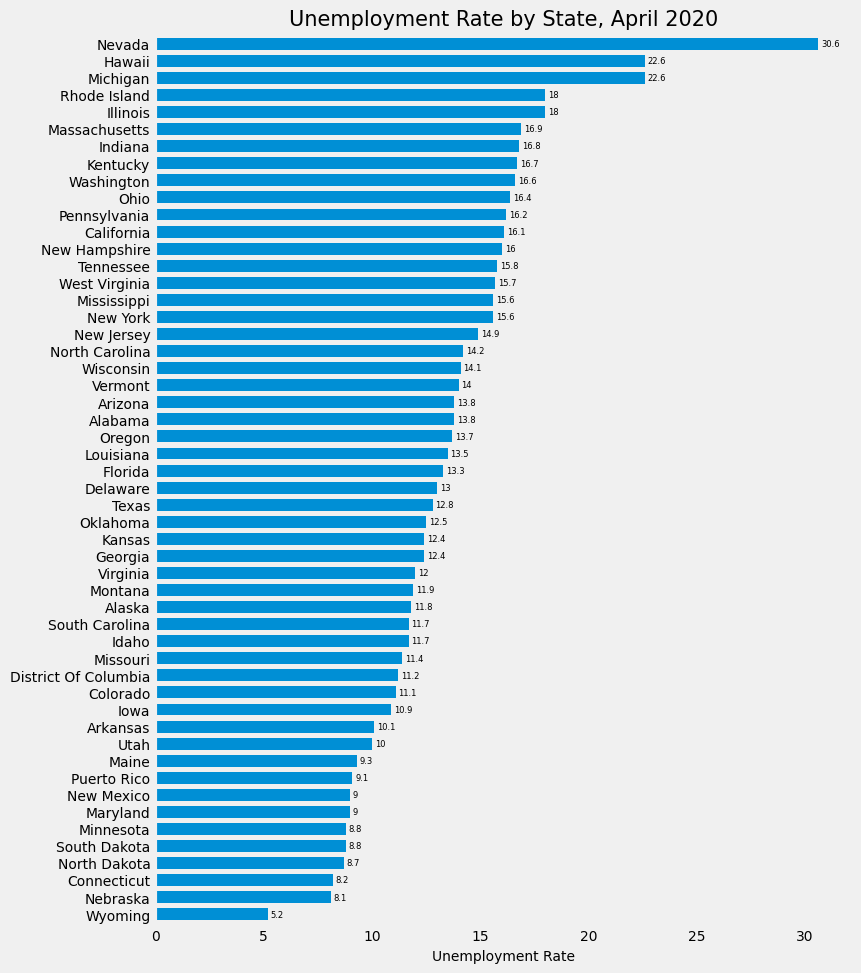

In [71]:

ax = df_filled[df_filled.index == '2020-04-01'].T \
.sort_values('2020-04-01') \
.plot(kind='barh', figsize =(8,11), width = 0.7, title = 'Unemployment Rate by State, April 2020', fontsize=10)

ax.title.set_size(15)

ax.legend().remove()

# x labels
ax.set_xlabel("Unemployment Rate", fontsize=10)

# Turns off grid.
ax.grid(False)

# Bar label
ax.bar_label(ax.containers[0], padding=2, fontsize=6)

plt.show()


#7. Pull Participation Rate

In [72]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2023-11-15,2023-11-15,Labor Force Participation Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,83,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2023-11-15,2023-11-15,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:11-05:00,65,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2023-11-15,2023-11-15,Labor Force Participation Rate - Women,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:09-05:00,65,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2023-11-15,2023-11-15,Labor Force Participation Rate - Men,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:14-05:00,58,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2023-11-15,2023-11-15,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:20-05:00,51,The series comes from the 'Current Population ...


##Keeps States only

In [73]:
for index, row in part_df.iterrows():
  if (("CIVPART" in row['id']) or ("LNS11" in row['id']) or ("LRAC" in row['id']) or
   ("LRIN" in row['id'])):
   part_df.drop(index, axis=0, inplace=True)
part_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2023-11-15,2023-11-15,Labor Force Participation Rate for California,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-20 09:01:05-05:00,17,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2023-11-15,2023-11-15,Labor Force Participation Rate for Alabama,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-20 09:01:09-05:00,7,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2023-11-15,2023-11-15,Labor Force Participation Rate for Kentucky,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-20 09:01:01-05:00,23,A state's labor-force participation rate is th...
LBSSA55,LBSSA55,2023-11-15,2023-11-15,Labor Force Participation Rate for Wisconsin,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-20 09:01:03-05:00,22,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2023-11-15,2023-11-15,Labor Force Participation Rate for Michigan,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-20 09:01:03-05:00,21,A state's labor-force participation rate is th...


In [74]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
part_id_to_state

{'LBSSA06': 'California',
 'LBSSA01': 'Alabama',
 'LBSSA21': 'Kentucky',
 'LBSSA55': 'Wisconsin',
 'LBSSA26': 'Michigan',
 'LBSSA12': 'Florida',
 'LBSSA36': 'New York',
 'LBSSA13': 'Georgia',
 'LBSSA28': 'Mississippi',
 'LBSSA48': 'Texas',
 'LBSSA39': 'Ohio',
 'LBSSA45': 'South Carolina',
 'LBSSA27': 'Minnesota',
 'LBSSA49': 'Utah',
 'LBSSA54': 'West Virginia',
 'LBSSA47': 'Tennessee',
 'LBSSA24': 'Maryland',
 'LBSSA17': 'Illinois',
 'LBSSA53': 'Washington',
 'LBSSA23': 'Maine',
 'LBSSA42': 'Pennsylvania',
 'LBSSA25': 'Massachusetts',
 'LBSSA08': 'Colorado',
 'LBSSA51': 'Virginia',
 'LBSSA37': 'North Carolina',
 'LBSSA22': 'Louisiana',
 'LBSSA31': 'Nebraska',
 'LBSSA19': 'Iowa',
 'LBSSA35': 'New Mexico',
 'LBSSA05': 'Arkansas',
 'LBSSA40': 'Oklahoma',
 'LBSSA18': 'Indiana',
 'LBSSA16': 'Idaho',
 'LBSSA04': 'Arizona',
 'LBSSA33': 'New Hampshire',
 'LBSSA02': 'Alaska',
 'LBSSA09': 'Connecticut',
 'LBSSA29': 'Missouri',
 'LBSSA50': 'Vermont',
 'LBSSA34': 'New Jersey',
 'LBSSA32': 'Nevada'

###Comine all the results and change state id to name

In [75]:
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    #time.sleep(0.1) # Don't request to fast and get blocked

part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]
part_states.head()


,California,Alabama,Kentucky,Wisconsin,Michigan,Florida,New York,Georgia,Mississippi,Texas,Ohio,South Carolina,Minnesota,Utah,West Virginia,Tennessee,Maryland,Illinois,Washington,Maine,Pennsylvania,Massachusetts,Colorado,Virginia,North Carolina,Louisiana,Nebraska,Iowa,New Mexico,Arkansas,Oklahoma,Indiana,Idaho,Arizona,New Hampshire,Alaska,Connecticut,Missouri,Vermont,New Jersey,Nevada,Kansas,Montana,North Dakota,Oregon,Delaware,Hawaii,South Dakota,Wyoming,Rhode Island,District Of Columbia
1976-01-01,62.6,57.0,60.5,65.6,61.6,55.8,58.0,63.7,58.8,63.8,61.7,65.3,65.6,62.8,52.5,59.6,64.3,63.0,60.9,62.1,58.4,64.8,67.2,65.9,66.5,56.8,64.9,64.4,60.8,57.9,59.3,64.0,63.0,59.5,65.9,69.0,64.2,60.5,63.6,61.5,71.3,65.1,62.7,62.6,62.9,62.7,69.9,64.6,65.3,63.8,64.4
1976-02-01,62.4,56.9,60.3,65.5,61.5,55.7,58.0,63.6,58.6,63.5,61.7,65.2,65.5,62.6,52.4,59.4,64.2,63.0,60.7,61.9,58.3,64.7,67.0,65.8,66.3,56.6,64.9,64.3,60.5,57.8,59.2,63.9,62.8,59.2,65.6,68.4,64.1,60.3,63.4,61.4,70.8,65.0,62.5,62.4,62.7,62.5,69.6,64.4,64.9,63.7,64.5
1976-03-01,62.2,56.8,60.2,65.4,61.5,55.5,58.0,63.5,58.5,63.4,61.7,65.0,65.4,62.5,52.3,59.3,64.1,62.9,60.6,61.9,58.3,64.6,66.8,65.6,66.2,56.5,64.8,64.2,60.3,57.7,59.1,63.8,62.7,59.1,65.6,67.8,64.0,60.3,63.2,61.4,70.5,64.9,62.4,62.3,62.5,62.5,69.6,64.4,64.7,63.6,64.5
1976-04-01,62.2,56.8,60.1,65.4,61.6,55.5,58.0,63.5,58.5,63.5,61.6,64.9,65.4,62.5,52.3,59.3,64.1,62.9,60.6,61.8,58.3,64.6,66.6,65.5,66.2,56.4,64.8,64.1,60.3,57.7,59.0,63.8,62.7,59.1,65.7,67.9,64.1,60.4,63.5,61.5,70.4,65.0,62.3,62.5,62.4,62.4,69.4,64.3,64.9,63.7,64.5
1976-05-01,62.3,56.8,60.1,65.5,61.7,55.4,58.1,63.6,58.5,63.6,61.6,64.7,65.5,62.6,52.2,59.4,64.1,63.0,60.7,61.7,58.3,64.6,66.5,65.4,66.3,56.4,64.8,64.1,60.3,57.7,59.0,63.9,62.8,59.1,66.0,67.9,64.3,60.6,63.6,61.6,70.5,65.1,62.2,62.6,62.5,62.4,69.3,64.3,65.2,63.6,64.4


##Checking for null values

<Axes: >

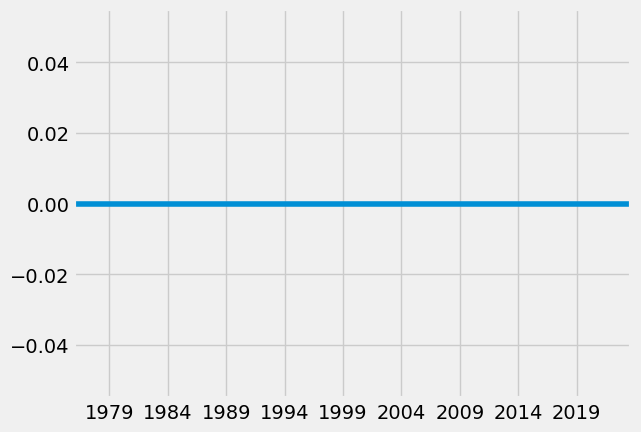

In [76]:

part_states.isna().sum(axis = 1).plot()

##8. Plot Unemployment vs Participation for each state 2020 & 2021

In [109]:
df_filled.columns.sort_values()
#'Puerto Rico'

pandas.core.indexes.base.Index

In [108]:
part_states.columns.sort_values()

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District Of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [95]:
#Unemployment Rates max and min
print("Max",df_filled.to_numpy().max())
print("Min",df_filled.to_numpy().min())


Max 30.6
Min 1.6


In [96]:
#Participation Rates max and min
print("Max",part_states.to_numpy().max())
print("Min",part_states.to_numpy().min())

Max 75.7
Min 51.0


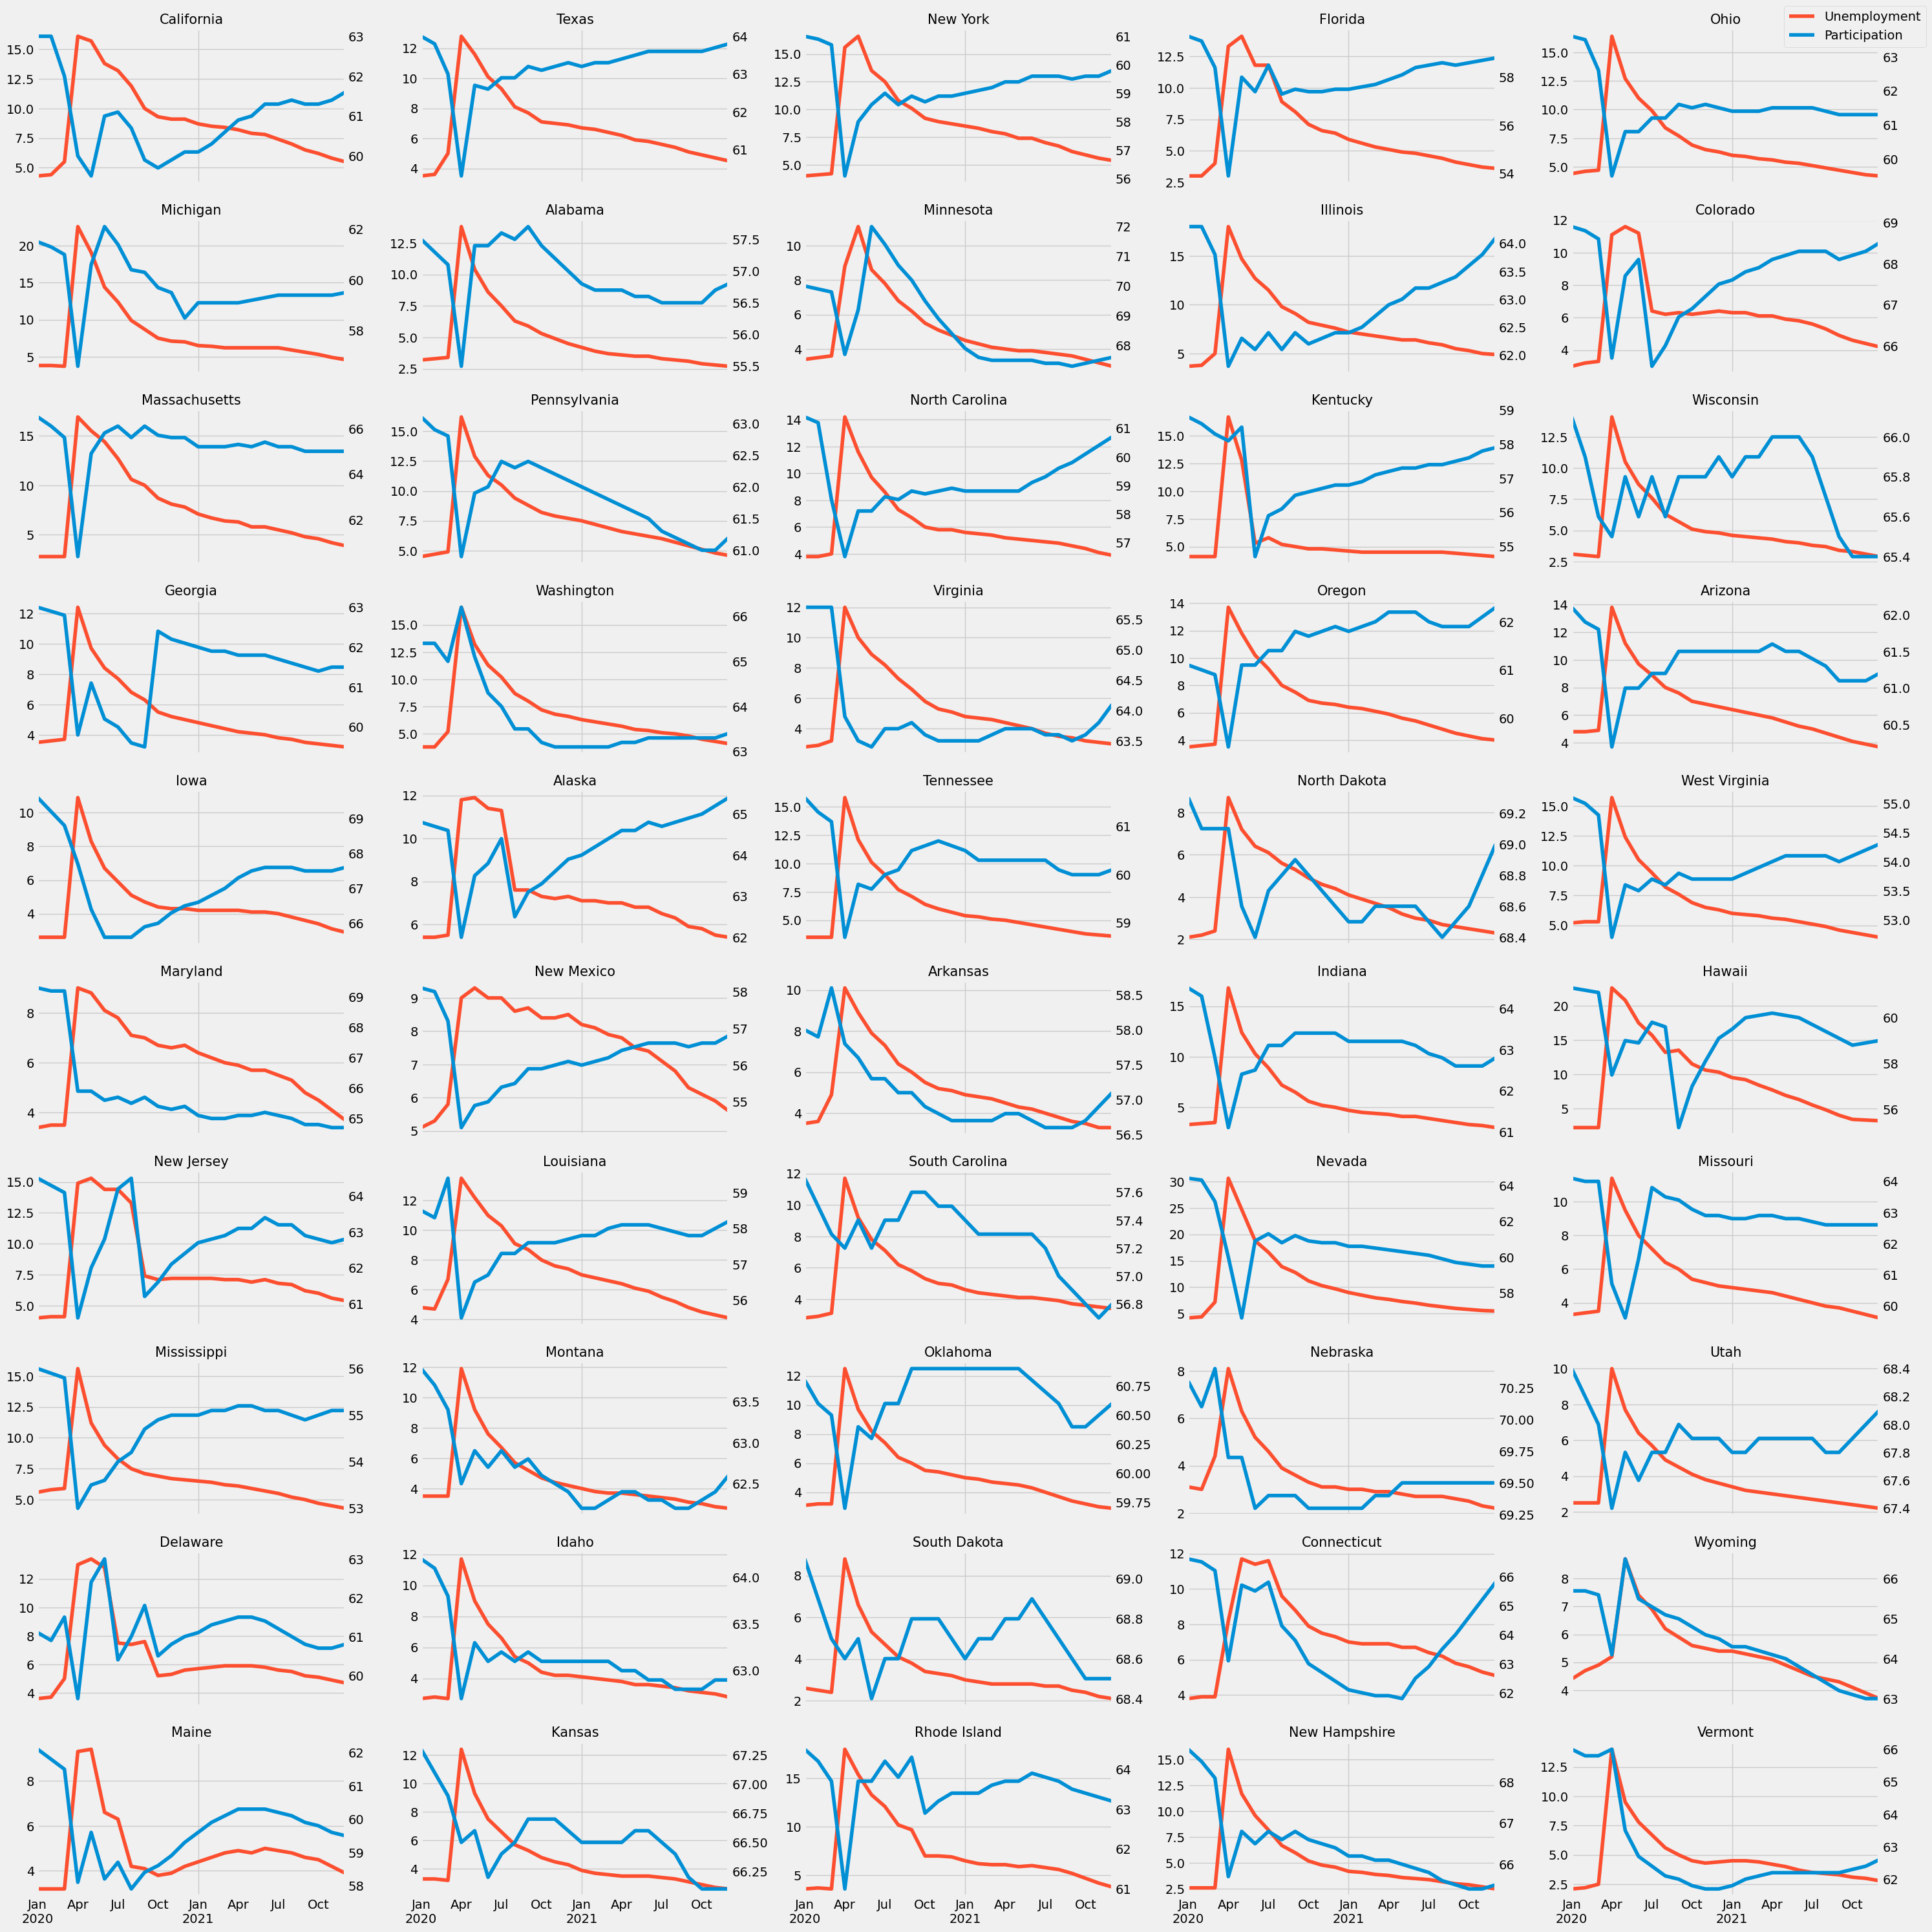

In [135]:
fig, axs = plt.subplots(10,5,figsize=(30,30), sharex = True)
axs = axs.flatten()

i = 0
#loop over states
for state in df_filled.columns:
  if state == 'Puerto Rico' or state == 'District Of Columbia':
    continue
  else:
    ax2 = axs[i].twinx()
  # set the same limits for both axis
    #a,b = 1.6,75.7
    #axs[i].set_ylim(a,b)
    #ax2.set_ylim(a,b)
    ln1 = df_filled.query('index >= 2020 and index < 2022')[state].plot(ax = axs[i], label = "Unemployment", color = color_pal[1])
    ln2 = part_states.query('index >= 2020 and index < 2022')[state].plot(ax = ax2, label  ="Participation")
    ax2.grid(False)
    axs[i].set_title(state, fontsize=15)
    i+=1

# Combine labels
lines, labels = axs[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines + lines2, labels + labels2)

plt.tight_layout()
plt.show()
